In [8]:
from briefcase.case import Case
from briefcase.case_base import CaseBase
from briefcase.enums import incons_enum
import import_ipynb
import pandas as pd
import matplotlib.pyplot as plt
import TelcoConverter as TC
import random
import yaml

historic_splits = [0.25, 0.5, 0.75, 0.95]

def get_existing_test_data(cluster="corr", test_split="0.25"):

    filename = f"data/telco-{cluster}-test-{test_split}.yaml"
    
    try:
        with open(filename, 'r') as file:
            data = yaml.safe_load(file)
        print(f"Loaded data successfully from '{filename}'")
    except FileNotFoundError:
        print(f"File '{filename}' not found.")
        print(f"Creating new file")
        data = TC.dataset_to_yaml(cluster, float(test_split))
    except Exception as e:
        print("An error occurred:", str(e))
        
    return data 

def test_constrainted_inconsistency(data_splits, constraint="ALL"):
    historic = data_splits['historic']
    new = data_splits['new']
    
    historic_cases = [Case.from_dict(c) for c in historic]
    cb = CaseBase(historic_cases)
    
    admitted = 0
    for item in new:
        new_case = Case.from_dict(item)
        # test without adding to case base
        if cb.order.admissibility_constraints.is_case_admissible(new_case.reason, new_case.defeated(), constraint):
            admitted += 1
            
    print(f"Number of cases admitted: {admitted}")
    size, inconsistencies = cb.metrics()
    return admitted, size, inconsistencies

def split_data(data):
    data_splits = {}
    for historic_split in historic_splits:
        historic = random.sample(data, k=int(historic_split * len(data)))
        # take 40 samples because max samples when 95% is 45
        new = random.sample(data, k=40)
        data_splits[historic_split] = {'historic': historic, 'new': new}
    return data_splits


## Admissibility experiments 
1. Split the data into a set of historic cases, and new cases 
2. Add each 

In [9]:
# Define the number of repetitions
repetitions = 20

# Initialize results list
results = []

# Repeat the experiment
for _ in range(repetitions):
    # Split the data
    data = get_existing_test_data()
    data_splits = split_data(data)
    
    for historic_split in historic_splits:
        for constraint in [incons_enum.NO, incons_enum.NO_NEW, incons_enum.NO_INVOLVEMENT, 
                           incons_enum.HORTY, incons_enum.NO_CORRUPTION, incons_enum.ALL]:
            print(f"\nHistoric Split: {historic_split}")
            print(f"Constraint: {constraint.name}")
            
            # Run the experiment
            admitted, cases_size, tainted_cases = test_constrainted_inconsistency(data_splits[historic_split], constraint=constraint)
            
            # Store the results
            results.append({'Historic Split': historic_split, 
                            'Constraint': constraint.name, 
                            'No. cases admitted': admitted,
                            "No. cases": cases_size,
                            "No. inconsistent cases": tainted_cases,
                            "No. total cases for admission": len(data_splits[historic_split]['new'])})

# Convert results to DataFrame for easier manipulation
results_df = pd.DataFrame(results)

# Group by Historic Split and Constraint, calculate the average
average_results = results_df.groupby(['Historic Split', 'Constraint']).mean().reset_index()

Loaded data successfully from 'data/telco-corr-test-0.25.yaml'

Historic Split: 0.25
Constraint: NO
Number of cases admitted: 0
Number of cases:  440
Number of tainted cases:  270

Historic Split: 0.25
Constraint: NO_NEW
Number of cases admitted: 27
Number of cases:  440
Number of tainted cases:  270

Historic Split: 0.25
Constraint: NO_INVOLVEMENT
Number of cases admitted: 21
Number of cases:  440
Number of tainted cases:  270

Historic Split: 0.25
Constraint: HORTY
Number of cases admitted: 36
Number of cases:  440
Number of tainted cases:  270

Historic Split: 0.25
Constraint: NO_CORRUPTION
Number of cases admitted: 40
Number of cases:  440
Number of tainted cases:  270

Historic Split: 0.25
Constraint: ALL
Number of cases admitted: 40
Number of cases:  440
Number of tainted cases:  270

Historic Split: 0.5
Constraint: NO
Number of cases admitted: 0
Number of cases:  880
Number of tainted cases:  472

Historic Split: 0.5
Constraint: NO_NEW
Number of cases admitted: 33
Number of case

In [10]:
average_results

,Historic Split,Constraint,No. cases admitted,No. cases,No. inconsistent cases,No. total cases for admission
0,0.25,ALL,40.00,440.0,276.90,40.0
1,0.25,HORTY,36.95,440.0,276.90,40.0
2,0.25,NO,0.00,440.0,276.90,40.0
3,0.25,NO_CORRUPTION,38.60,440.0,276.90,40.0
4,0.25,NO_INVOLVEMENT,24.05,440.0,276.90,40.0
5,0.25,NO_NEW,28.55,440.0,276.90,40.0
6,0.50,ALL,40.00,880.0,470.65,40.0
7,0.50,HORTY,39.10,880.0,470.65,40.0
8,0.50,NO,0.00,880.0,470.65,40.0
9,0.50,NO_CORRUPTION,39.55,880.0,470.65,40.0


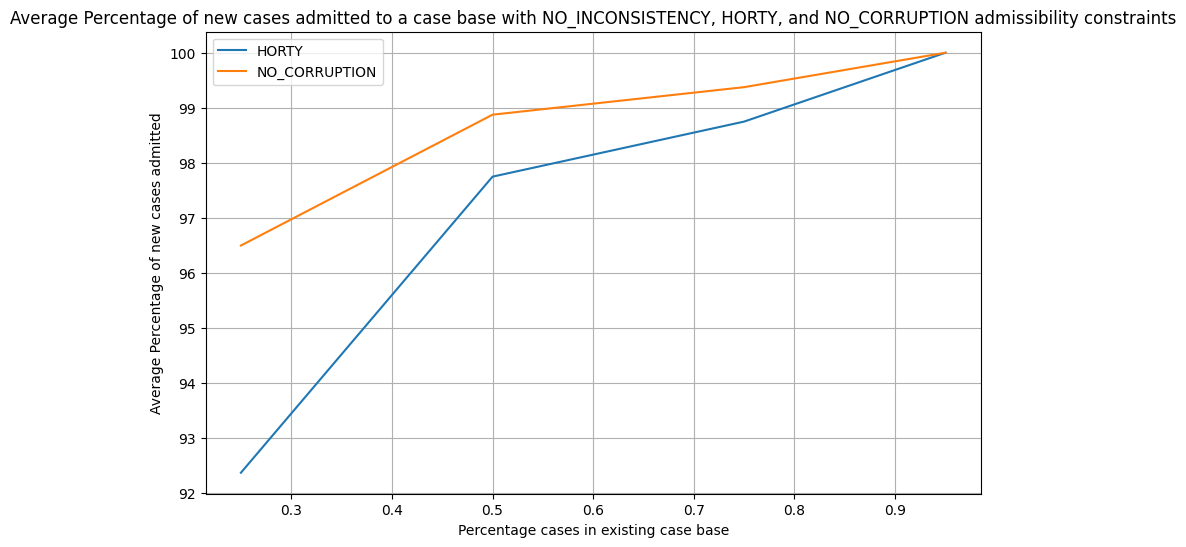

In [11]:
# Calculate the percentage of new cases admitted
average_results['Percentage new cases admitted'] = average_results['No. cases admitted'] / average_results['No. total cases for admission'] * 100

# Filter DataFrame for the constraints HORTY, NO, and NO_CORRUPTION
filtered_df = average_results[average_results['Constraint'].isin(['HORTY', 'NO_CORRUPTION'])]

# Plotting
plt.figure(figsize=(10, 6))

for constraint in filtered_df['Constraint'].unique():
    sub_df = filtered_df[filtered_df['Constraint'] == constraint]
    plt.plot(sub_df['Historic Split'], sub_df['Percentage new cases admitted'], label=constraint)

plt.title(f"Average Percentage of new cases admitted to a case base with NO_INCONSISTENCY, HORTY, and NO_CORRUPTION admissibility constraints")
plt.xlabel("Percentage cases in existing case base")
plt.ylabel("Average Percentage of new cases admitted")
plt.legend()
plt.grid(True)
plt.show()

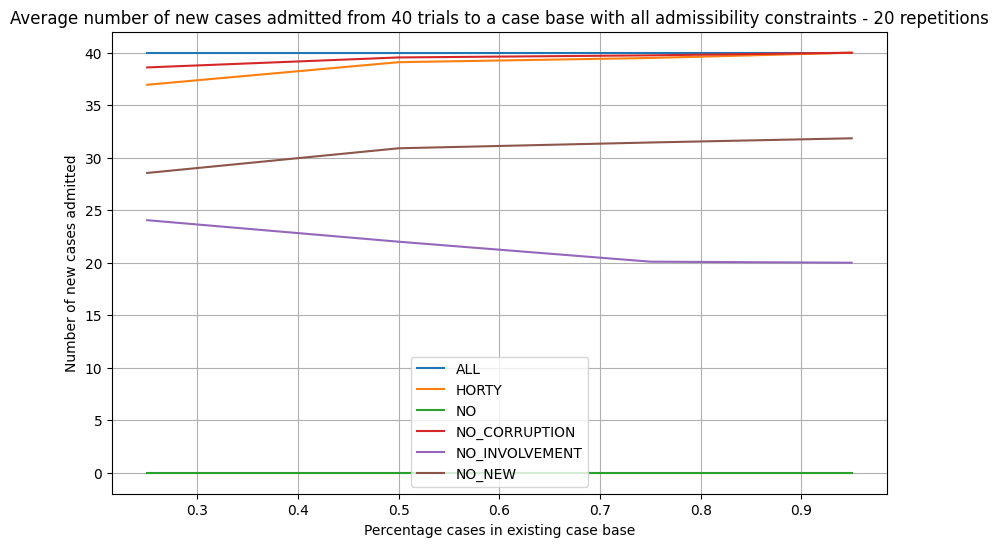

In [14]:
# Plotting
plt.figure(figsize=(10, 6))

for constraint in average_results['Constraint'].unique():
    sub_df = average_results[average_results['Constraint'] == constraint]
    plt.plot(sub_df['Historic Split'], sub_df['No. cases admitted'], label=constraint)

plt.title(f"Average number of new cases admitted from 40 trials to a case base with all admissibility constraints - {repetitions} repetitions")
plt.xlabel("Percentage cases in existing case base")
plt.ylabel("Number of new cases admitted")
plt.legend()
plt.grid(True)
plt.show()

## Starting from an empty casebase how many admissions before we get an inconsistent set?

In [32]:
import statistics

def test_admit_bf_incons(data, repeats=51):
    # Set the seed for reproducibility
    random.seed(42)
    scores = []
    for k in range(repeats):
        temp_data = data
        random.shuffle(temp_data)
        cb = CaseBase([])  
        score = 0
        for i in range(len(temp_data)):
            new_case = Case.from_dict(temp_data[i])
            if not cb.add_case(new_case, "NO"):
                score = i
                break
            
        scores.append(score)
        print(f"{k}: The number of cases we can admit before we create an inconsistency {score}")

    avg = round(sum(scores) / repeats)
    std_dev = round(statistics.stdev(scores), 2)
    print(f"Average score: {avg}")
    print(f"Standard deviation: {std_dev}")


In [33]:
test_admit_bf_incons(get_existing_test_data())

Loaded data successfully from 'data/telco-corr-test-0.25.yaml'
0: The number of cases we can admit before we create an inconsistency 56
1: The number of cases we can admit before we create an inconsistency 28
2: The number of cases we can admit before we create an inconsistency 70
3: The number of cases we can admit before we create an inconsistency 17
4: The number of cases we can admit before we create an inconsistency 35
5: The number of cases we can admit before we create an inconsistency 15
6: The number of cases we can admit before we create an inconsistency 39
7: The number of cases we can admit before we create an inconsistency 29
8: The number of cases we can admit before we create an inconsistency 44
9: The number of cases we can admit before we create an inconsistency 25
10: The number of cases we can admit before we create an inconsistency 6
11: The number of cases we can admit before we create an inconsistency 37
12: The number of cases we can admit before we create an inc